In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\Downloads\healthcare_dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [12]:
df['Admission Type'].nunique

<bound method IndexOpsMixin.nunique of 0           Urgent
1        Emergency
2        Emergency
3         Elective
4           Urgent
           ...    
55495     Elective
55496     Elective
55497       Urgent
55498     Elective
55499       Urgent
Name: Admission Type, Length: 55500, dtype: object>

In [3]:
df['Admission Type'] = df['Admission Type'].map({'Urgent': 0, 'Emergency': 1, 'Elective': 2})

In [5]:
df.drop(['Name'], axis=1, inplace=True)

In [7]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  int64  
 2   Blood Type          55500 non-null  int64  
 3   Medical Condition   55500 non-null  int64  
 4   Date of Admission   55500 non-null  int64  
 5   Doctor              55500 non-null  int64  
 6   Hospital            55500 non-null  int64  
 7   Insurance Provider  55500 non-null  int64  
 8   Billing Amount      55500 non-null  float64
 9   Room Number         55500 non-null  int64  
 10  Admission Type      55500 non-null  int64  
 11  Discharge Date      55500 non-null  int64  
 12  Medication          55500 non-null  int64  
 13  Test Results        55500 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.9 MB


In [9]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,1,5,2,1729,26612,29933,1,18856.281306,328,0,1730,3,2
1,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2
3,28,0,6,3,560,22511,12317,3,37909.782410,450,2,589,1,0
4,43,0,2,2,1230,21259,33598,0,14238.317814,458,0,1249,4,0


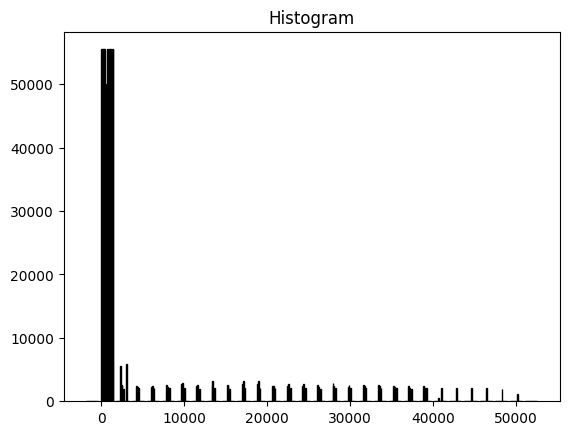

In [10]:
plt.hist(df, bins=30, edgecolor='k')
plt.title('Histogram')
plt.show()

In [11]:
scaler = RobustScaler()
# num_cols = df.select_dtypes(include='number').columns
x = df.drop(columns=['Admission Type'])
y = df['Admission Type']

x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

df = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)

In [12]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Discharge Date,Medication,Test Results,Admission Type
0,-0.666667,0.0,0.50,-0.333333,0.892391,0.328741,0.593930,-0.5,-0.271846,0.130653,0.877174,0.5,0.5,0
1,0.303030,0.0,-0.75,0.666667,-0.873913,0.681255,-0.158913,0.5,0.329760,-0.185930,-0.884783,-0.5,0.0,1
2,0.727273,-1.0,-0.50,0.666667,0.353261,0.890679,-0.728858,-1.0,0.098336,-0.487437,0.352174,-1.0,0.5,1
3,-0.727273,-1.0,0.75,0.000000,-0.378261,0.123275,-0.358737,0.5,0.503339,0.743719,-0.363043,-0.5,-0.5,2
4,-0.272727,-1.0,-0.25,-0.333333,0.350000,0.060548,0.792131,-1.0,-0.459727,0.783920,0.354348,1.0,-0.5,0


In [14]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
x_train.shape, x_val.shape, x_test.shape

((44400, 13), (5550, 13), (5550, 13))

In [18]:
y_train.shape, y_val.shape, y_test.shape

((44400,), (5550,), (5550,))

In [29]:
models = {
  'DecisionTreeClassifier': DecisionTreeClassifier(),
  'RandomForestClassifier': RandomForestClassifier(),
  'LGBMClassifier': LGBMClassifier(),
  'GradientBoostingClassifier': GradientBoostingClassifier()
}

param_dist = {
  'max_depth': [None, 10, 20, 30, 40],
  'min_samples_split': [3,6,9],
  'min_samples_leaf': [1,4,5],
  'max_features': [None, 'sqrt', 'log2']
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

results = []
for name, model in models.items():
  random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    refit='r2',
    scoring={'mse':mse_scorer,'r2':r2_scorer},
    n_jobs=-1
        )
  random_search.fit(x_train, y_train)
  y_pred = random_search.predict(x_val)

  mse = mean_squared_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)

  results.append({'Model': name, 'mse': mse, 'r2': r2})
results_df = pd.DataFrame(results).sort_values(by='r2', ascending=False)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1628
[LightGBM] [Info] Number of data points in the train set: 44400, number of used features: 13
[LightGBM] [Info] Start training from score -1.098883
[LightGBM] [Info] Start training from score -1.111328
[Ligh

KeyboardInterrupt: 

In [31]:
gb_model = GradientBoostingClassifier()
param_dist

{'max_depth': [None, 10, 20, 30, 40],
 'min_samples_split': [3, 6, 9],
 'min_samples_leaf': [1, 4, 5],
 'max_features': [None, 'sqrt', 'log2']}

In [32]:
random_search

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4, 5],
                                        'min_samples_split': [3, 6, 9]},
                   refit='r2',
                   scoring={'mse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                            'r2': make_scorer(r2_score, response_method='predict')})

In [ ]:
param_dist = {
  'max_depth': [None, 5, 10],
  'min_samples_split': [3,4,5],
  'min_samples_leaf': [1,4,5],
  'max_features': [None, 'sqrt', 'log2']
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    refit='r2',
    scoring={'mse':mse_scorer,'r2':r2_scorer},
    n_jobs=-1
        )
random_search.fit(x_train, y_train)
y_pred = random_search.predict(x_val)

In [37]:
gb_model = model.fit(x_train, y_train)

In [38]:
y_pred = gb_model.predict(x_val)

In [39]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [46]:
results.append({'Model': 'GradientBoostingClassifier', 'mse': mse, 'r2': r2})

In [47]:
results_df = pd.DataFrame(results).sort_values(by='r2', ascending=False)

In [52]:
results_df.drop(columns=['GradientBoostingClassifier'], inplace=True)

In [54]:
results_df = results_df.drop_duplicates()

In [55]:
results_df

,Model,mse,r2
1,RandomForestClassifier,1.153333,-0.720377
0,DecisionTreeClassifier,1.169910,-0.745103
2,LGBMClassifier,1.340901,-1.000163
3,NaN,1.411892,-1.106057
4,GradientBoostingClassifier,1.411892,-1.106057
